<img src="img/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Getting Started with Qiskit

Here, we provide an overview of working with Qiskit. Qiskit provides the basic building blocks necessary to program quantum computers. 


### The "big picture"

<img src="img/qiskit_components.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">


The foundation of Qiskit is the **Terra** element. The basic concept of Qiskit Terra is an array of quantum circuits. A workflow using Terra consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** allows you to run them on different backends.  After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted, or allows you to make a better program for the next instance.

**Aqua** is where algorithms for NISQ computers are built. These algorithms can be used to build applications for quantum computing. Aqua is accessible to domain experts in chemistry, optimization or AI, who want to explore the benefits of using quantum computers as accelerators for specific computational tasks, without needing to worry about how to translate the problem into the language of quantum machines.

With **Aer** it is possible to access high-quality, high-performance simulators and continue to improve their scalability and features. Aer will help us understand the limits of classical processors by demonstrating to what extent they can mimic quantum computation. Furthermore, we can use Aer to verify that current and near-future quantum computers function correctly. 


**Contents**

[Summary of quantum operations](#quantum_operations)

[Circuit basics](#circuit_basics)

[Simulating circuits with Qiskit Aer](#aer_simulation)

[Running circuits using the IBMQ provider](#ibmq_provider)

[Practical exercises](#exercises)

**Code imports**

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

# Ignore warnings for the purpose of this demonstration
import warnings; warnings.simplefilter('ignore')

In [2]:
# Relevant QISKit modules
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, BasicAer, IBMQ
import qiskit.tools.visualization
from qiskit.quantum_info import state_fidelity

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $|0\rangle$ is $|\alpha|^2$ and $|1\rangle$ is $|\beta|^2$. As a vector this is

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $|\psi\rangle := e^{i\delta} |\psi\rangle$ we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

<img src="img/Bloch_sphere.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="center">

By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis. 

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

A general unitary must be able to take the $|0\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates<a id='quantum_operations'></a>

Some of the single-qubit gates available are:
- Identity and measurement gates
- Pauli gates
- Hadamard gate
- Phase-shift gates
- u gates

### Identity gate

In [5]:
# Create registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

# Create quantum circuit
qc_id = QuantumCircuit(qr, cr)

# Finally, perform identity operation
qc_id.iden(qr)

# Draw the circuit (ASCII)
qc_id.draw()

### Measurement gate

Measurement operations can be performed by defining the correspondence between the measured qubit and the bit where the result of the operation (0 or 1) is going to be stored. Since the measuring process physically collapses the qubit into a classical state, QISKit does not allow for subsequent operations on the measured qubit.

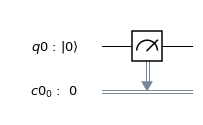

In [7]:
# Quantum circuit
qc_ground = QuantumCircuit(qr, cr)

#Measurement operation
qc_ground.measure(qr[0], cr[0])

# Draw circuit (matplotlib)
qc_ground.draw(output='mpl')

### Pauli gates

#### Gate $X$: bit-flip gate 

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. This is quantum analogue to a classical NOT gate.

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<img src="img/xbloch.png" width="700 px" align="center">

Its matrix representation is:
$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

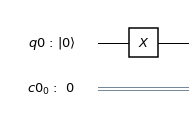

In [5]:
# Quantum circuit
qc_excited = QuantumCircuit(qr, cr)

# Perform x gate
qc_excited.x(qr)

# Draw circuit
qc_excited.draw(output='mpl')

Similarly, the Y and Z gates rotate the state around their respective axes. 

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians.
This gate maps $| 0 \rangle $ to $i | 1 \rangle $ and $| 1 \rangle$ to $ - i | 0 \rangle$

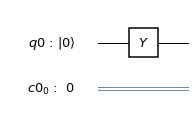

In [6]:
# Quantum circuit
qc_phase_flip_y = QuantumCircuit(qr, cr)

# Perform operation
qc_phase_flip_y.y(qr)

# Draw circuit
qc_phase_flip_y.draw(output='mpl')

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

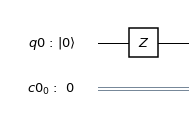

In [7]:
# Quantum circuit
qc_phase_flip_z = QuantumCircuit(qr, cr)

# Perform the operation
qc_phase_flip_z.z(qr)

# Draw the circuit
qc_phase_flip_z.draw(output='mpl')

### Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the states has equal value.

<img src="img/hbloch.png" width="700 px" align="center">

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement, as shown in the following figure.


<img src="img/hhbloch.png" width="700 px" align="center">


The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

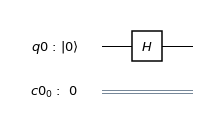

In [9]:
# Quantum circuit
qc_superposition = QuantumCircuit(qr, cr)

# Perform the operation
qc_superposition.h(qr)

# Draw the circuit
qc_superposition.draw(output='mpl')

QISKit, through the Aer component, also allows us to visualize the Bloch sphere of a single qubit state:

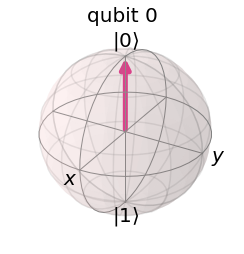

In [8]:
# Import plotting tools
from qiskit.tools.visualization import plot_bloch_multivector

# Simulate statevector of the initial qubit state and represent it over the Bloch sphere
backend = BasicAer.get_backend('statevector_simulator')
result_ground = execute(qc_ground , backend).result()
bloch_ground = result_ground.get_statevector(qc_ground)
plot_bloch_multivector(bloch_ground)

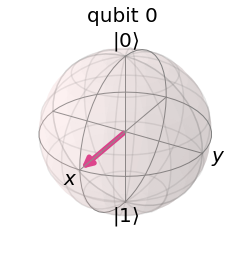

In [10]:
# Plot the Bloch sphere of the qubit state after performing the Hadamard gate
result_h = execute(qc_superposition, backend).result()
bloch_h= result_h.get_statevector(qc_superposition)
plot_bloch_multivector(bloch_h)

### Phase Shift Operations

The $S$ and $T$ gates correspond to phase-shift operations. A generalised phase shift gate leaves the basis state $|0\rangle$ unchanged, and maps $| 1 \rangle $ to $e^{i\phi}|1 \rangle$. The $S$ gate changes the phase by $\pi/2$, and $T$ changes the phase by $\pi/4$; $S^\dagger$ and $T^\dagger$ are their respective inverses, i.e. they map $|1\rangle$ to $e^{-i\phi}|1\rangle$.

Note that the Z gate is a particular instance of a phase-shift gate, shifting the state of the qubit by a phase $\pi$: $e^{i\pi}|1 \rangle = -|1\rangle$.

<img src="img/phasebloch.png" width="800 px" align="center">


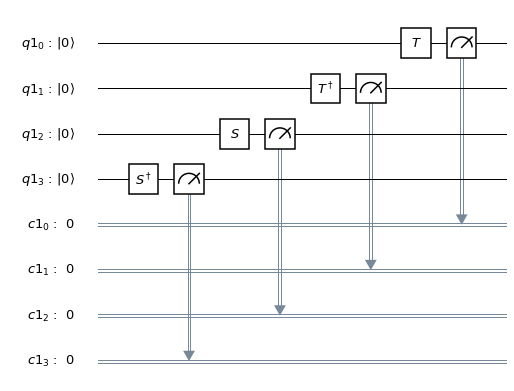

In [11]:
# Creating registers
qr4 = QuantumRegister(4)
cr4 = ClassicalRegister(4)

# Quantum circuit
qc_phase = QuantumCircuit(qr4, cr4)

# Perform operations on different qubits
qc_phase.t(qr4[0])
qc_phase.tdg(qr4[1])
qc_phase.s(qr4[2])
qc_phase.sdg(qr4[3])

# Optionally, add the measurement gates after all computations are finished
qc_phase.measure(qr4[0], cr4[0])
qc_phase.measure(qr4[1], cr4[1])
qc_phase.measure(qr4[2], cr4[2])
qc_phase.measure(qr4[3], cr4[3])

# Draw the circuit
qc_phase.draw(output='mpl')



### Unitary Gates


More general quantum operations can be performed using the so-called unitary gates, by previously defining constraint parameters $\theta$, $\phi$, $\lambda$, such that:

$$
U3(\theta, \phi, \lambda) = 
	    \begin{pmatrix}
        \cos{(\theta/2)} & -e^{i\lambda}\sin{(\theta/2)}\\ 
        e^{i\phi}\sin{(\theta/2)} & e^{i(\lambda + \phi)}\cos{(\theta/2)}
        \end{pmatrix}
$$

Operators $U2$ and $U1$ are obtained from U3 by simply restricting the parameters:

$$
U2(\phi, \lambda) = U3(\pi/2, \phi, \lambda) = \frac{1}{\sqrt{2}}
	    \begin{pmatrix}
        1 & -e^{i\lambda}\\ 
        e^{i\phi} & e^{i(\lambda + \phi)}
        \end{pmatrix}
$$

$$
    U1(\lambda) = U3(0, 0, \lambda) =
	    \begin{pmatrix}
        1 & 0\\ 
        0 & e^{i\lambda}
        \end{pmatrix}
$$

The operator $U2$ allows for the creation of arbitrary superpositions.

The operator $U1$ allows for an arbitrary phase shift $\lambda$.

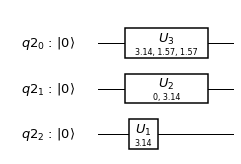

In [12]:
# Create registers
qr3 = QuantumRegister(3)

# Quantum Circuit
qc_unitary = QuantumCircuit(qr3)

# Perform unitary operations on different qubits
qc_unitary.u3(pi, pi/2, pi/2, qr3[0])
qc_unitary.u2(0, pi, qr3[1])
qc_unitary.u1(pi, qr3[2])

# Draw the circuit
qc_unitary.draw(output='mpl')

Unitary gates can be used to perform any arbitrary unitary operation on a qubit:

$$
U3 (\pi, \pi/2, \pi/2) = \mbox{gate Y}
$$

$$
U2 (0,\pi) = \mbox{Hadamard}
$$

$$
U1(\pi) = \mbox{gate Z}
$$

## Multi-qubit gates

### CNOT gate 


Note that multiple-qubit quantum states can be written in the ket notation with a tensor product. The tensor product is typically implicit; for a state composed of qubits $q_0$ and $q_1$:

$$
|q_1\rangle \otimes |q_0\rangle =  |q_1\rangle |q_0\rangle = |q_1 q_0\rangle
$$

The convention adopted by IBM writes the first qubit at the far-right of the ket, and adds each additional qubit on the left.

The controlled X (or controlled NOT) gate allows for the creation of entanglement between two qubits. The CNOT gate's action on basis states is to flip, i.e. apply an X gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise it does nothing.


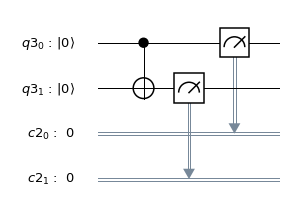

In [13]:
# Create registers and quantum circuit
qr2 = QuantumRegister(2)
cr2 = ClassicalRegister(2)
qc_cnot = QuantumCircuit(qr2, cr2)

# Perform CNOT operation
qc_cnot.cx(qr2[0], qr2[1])


qc_cnot.measure(qr2[0], cr2[0])
qc_cnot.measure(qr2[1], cr2[1])

qc_cnot.draw(output='mpl')

The controlled-not gate flips the `target` qubit when the control qubit is in the state $|1\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

<div class="alert alert-block alert-warning">
<b>Example:</b> 
 Admit a CNOT gate $CX_{01}$ with qubit $q_0$ as control, and $q_1$ as target. If the target qubit is in state $|q_1\rangle = | 0 \rangle $, and the control qubit is in the superposition state $| q_0 \rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1 \rangle)$, the two-qubit state can be written as a tensor product (i.e. a separable state):
    
<br>
$$
|q_1 q_0 \rangle = |0\rangle \otimes \frac{1}{\sqrt{2}} \left ( |0\rangle + |1\rangle \right ) = \frac{1}{\sqrt{2}}\left ( |00\rangle + |01\rangle \right )
$$
<br>
The CNOT gate will map the two-qubit basis state $|01\rangle$ to the state $|11\rangle $, while leaving $|00\rangle$ unchanged:
<br>
$$
CX_{01} |q_1 q_0\rangle = \frac{1}{\sqrt{2}}\left ( |00\rangle + |11\rangle \right )
$$
<br>
The two-qubit state can not be described in terms of individual qubits - the qubits are **entangled**.
</div>

### Other Quantum Operations

The gate set presented in the composer is universal, i.e. it is possible to decompose any quantum operations over n qubits to arbitrary precision using only the set of gates previously presented (how to efficiently determine and perform such a decomposition, however, is a subject of much debate). 
    
Other notable operators are the __SWAP gate__, which exchanges the state between two qubits, and can be performed using 3 CNOT gates: 


$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

And also the __Toffoli gate__ (or **CCNOT**), which performs a NOT operations on a target qubit, using two other qubits as controls.

$$
CCX = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

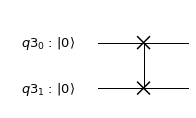

In [14]:
# Create quantum circuit
qc_swap = QuantumCircuit(qr2)

# Perform quantum operation
qc_swap.swap(qr2[0], qr2[1])

# Draw the circuit
qc_swap.draw(output='mpl')

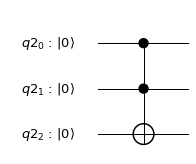

In [15]:
# Create quantum circuit
qc_toffoli = QuantumCircuit(qr3)

# Perform quantum operation
qc_toffoli.ccx(qr3[0],qr3[1],qr3[2])

# Draw the circuit
qc_toffoli.draw(output='mpl')

<div class="alert alert-block alert-info">
<b>Note:</b> Multi-qubit states, in general, cannot be expressed by simply representing each qubit's bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, due to the possibility of correlation and entanglement between qubits in each axis.
</div>

One such attempt is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). For simplification, let's admit only the Z and X axis of the bloch sphere and represent each separately:


<img src="img/multibloch_A.png" width="600 px" align="center">

If one adds another qubit to the system, extra bars need to be added to account for correlations between measurement bases (ie. axes):

<img src="img/multibloch_b.png" width="600 px" align="center">

From this visualization, it is clearer why, for a quantum system, its description is more than the sum of descriptions for each individual qubit. Adding a third qubit to this system, this representation would need 3 dimensions (i.e. a cube) for the representation of correlations between all three qubits, adding a fourth qubit would require 4 dimensions, and so on. 

<div class="alert alert-block alert-info">
<b>Look for more information about available quantum operations in :</b> [Summary of quantum operations](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/terra/summary_of_quantum_operations.ipynb)
</div>

## Circuit Basics <a id='circuit_basics'></a>


### Building the circuit

The basic elements needed for your first program are the QuantumCircuit, and QuantumRegister.

In [17]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

<div class="alert alert-block alert-info">
<b>Note:</b> Naming the QuantumRegister is optional and not required.
</div>

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the documentation you will find more gates and circuits; the below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a 3-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
* A Hadamard gate $H$ on qubit 0, which puts it into a superposition state.
* A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
* A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit Terra, operations can be added to the circuit one-by-one, as shown below.

In [17]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[2]);

## Visualize Circuit

You can visualize your circuit using Qiskit Terra `QuantumCircuit.draw()`, which plots circuit in the form found in many textbooks.

In [18]:
# Draw circuit in ASCII
circ.draw()

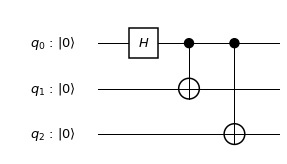

In [19]:
# Draw circuit in matplotlib
circ.draw(output='mpl')

In this circuit, the qubits are put in order with qubit zero at the top and qubit two at the bottom. The circuit is read left-to-right (meaning that gates which are applied earlier in the circuit show up further to the left).

<div class="alert alert-block alert-info">
<b>Note:</b> there are many options of circuit visualization. See [Visualizing a quantum circuit](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/terra/visualizing_a_quantum_circuit.ipynb).
</div>

## Simulating circuits using Qiskit Aer <a id='aer_simulation'></a>

Qiskit Aer is the package for simulating quantum circuits. It provides many different backends for doing a simulation. Here we use the basic python version.

### Statevector backend

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the quantum 
state which is a complex vector of dimensions $2^n$ where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

<div class="alert alert-block alert-info">


When representing the state of a multi-qubit system, the tensor order used in qiskit is different than that use in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. In most textbooks (such as Nielsen and Chuang's "Quantum Computation and Information"), the basis vectors for the $n$-qubit state space would be labeled as $Q_{0}\otimes Q_{1} \otimes \cdots \otimes Q_{n}$. **This is not the ordering used by qiskit!** Instead, qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the _left_ side of the tesnsor product, so that the basis vectors are labeled as  $Q_n\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, qiskit would represent this state as $|100\rangle$, whereas most physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, qiskit represents a controlled-X ($C_{X}$) operation with qubit 0 being the control and qubit 1 being the target as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

</div>

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to `statevector_simulator`.

In [20]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')

Now we have chosen the backend it's time to compile and run the quantum circuit. In Qiskit Terra we provide the `execute` function for this. ``execute`` returns a ``job`` object that encapsulates information about the job submitted to the backend.


<div class="alert alert-block alert-info">
<b>Tip:</b> You can obtain the above parameters in Jupyter. Simply place the text cursor on a function and press Shift+Tab.
</div>

In [21]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()` which return the status of the job and a result object respectively.

<div class="alert alert-block alert-info">
<b>Note:</b> Jobs run asynchronously but when the result method is called it switches to synchronous and waits for it to finish before moving on to another task.
</div>

In [22]:
result = job.result()

The results object contains the data and Qiskit Terra provides the method 
`result.get_statevector(circ)` to return the state vector for the quantum circuit.

In [23]:
outputstate = result.get_statevector(circ, decimals=3)

for n in outputstate:
    print(n)

(0.707+0j)
0j
0j
0j
0j
0j
0j
(0.707+0j)


Qiskit Terra also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state vector.

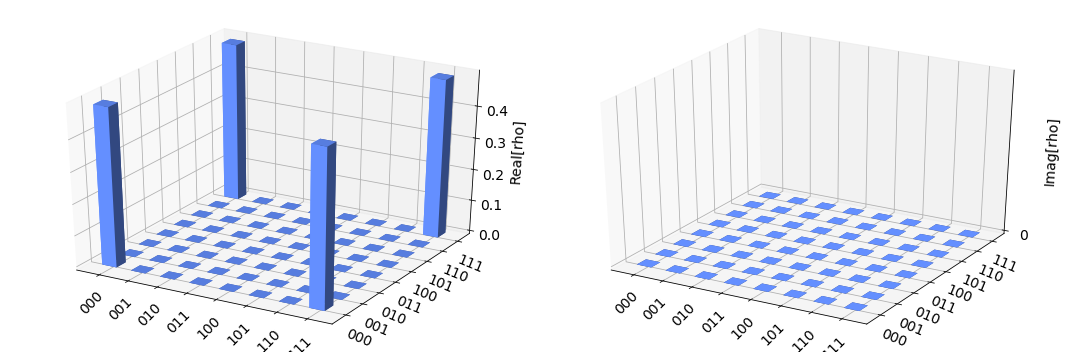

In [24]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(outputstate)

### Unitary backend

Qiskit Aer also includes a `unitary_simulator` that works _provided all the elements in the circuit are unitary operations_. This backend calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit. 

In [25]:
# Run the quantum circuit on a unitary simulator backend
backend = BasicAer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
#print(np.matrix(result.get_unitary(circ, decimals=3)))

def printArray(arr):
    for row in arr:
        for item in row:
            print("{:8.3f}".format(item), end = "  ")
        print("\n")

printArray(result.get_unitary(circ, decimals=3))

0.707+0.000j  0.707+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  

0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.707+0.000j  -0.707+0.000j  

0.000+0.000j  0.000+0.000j  0.707+0.000j  0.707+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  

0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.707+0.000j  -0.707+0.000j  0.000+0.000j  0.000+0.000j  

0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.707+0.000j  0.707+0.000j  0.000+0.000j  0.000+0.000j  

0.000+0.000j  0.000+0.000j  0.707+0.000j  -0.707+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  

0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.707+0.000j  0.707+0.000j  

0.707+0.000j  -0.707+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  0.000+0.000j  



### OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

$$|\psi\rangle = |000\rangle +|111\rangle)/\sqrt{2},$$

and let $xyz$ denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way, which is why Qiskit uses a non-standard tensor product order.

The probability of obtaining outcome $xyz$ is given by

$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}.$$

By explicit computation, we see there are only two bitstrings that will occur: $000$ and $111$. If the bitstring $000$ is obtained, the state of the qubits is $|000\rangle$, and if the bitstring is $111$, the qubits are left in the state $|111\rangle$. The probability of obtaining 000 or 111 is the same; namely, 1/2:

$$\begin{align}
\mathrm{Pr}(000) &= |\langle 000 | \psi \rangle |^{2} = \frac{1}{2}\\
\mathrm{Pr}(111) &= |\langle 111 | \psi \rangle |^{2} = \frac{1}{2}.
\end{align}$$

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

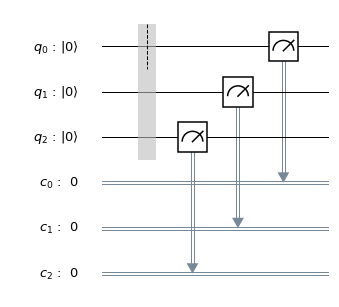

In [18]:
# Create a Classical Register with 3 bits.
c = ClassicalRegister(3, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)

# Add barrier to ensure separation of circuits
meas.barrier(q)
# map the quantum measurement to the classical bits
meas.measure(q,c)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw(output='mpl')

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``qasm_simulator`` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

In [27]:
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [28]:
counts = result_sim.get_counts(qc)
print(counts)

{'111': 529, '000': 495}


Approximately 50 percent of the time the output bitstring is 000. Qiskit Terra also provides a function `plot_histogram` which allows you to view the outcomes. 

In [21]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

NameError: name 'counts' is not defined

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

## Running circuits using the IBMQ provider <a id='ibmq_provider'></a>

To faciliate access to real quantum computing hardware, we have provided a simple API interface.
To access IBMQ devices, you'll need an API token. For the public IBM Q devices, you can generate an API token [here](https://quantumexperience.ng.bluemix.net/qx/account/advanced) (create an account if you don't already have one). For Q Network devices, login to the q-console, click your hub, group, and project, and expand "Get Access" to generate your API token and access url.

Our IBMQ provider lets you run your circuit on real devices or on our HPC simulator. Currently, this provider exists within Qiskit, and can be imported as shown below. For details on the provider, see [The IBMQ Provider](the_ibmq_provider.ipynb).

In [12]:
from qiskit import IBMQ

After generating your API token, call, `IBMQ.save_account('MY_TOKEN')`. For Q Network users, you'll also need to include your access url: `IBMQ.save_account('MY_TOKEN', 'URL')`

This will store your IBMQ credentials in a local file.  Unless your registration information has changed, you only need to do this once.  You may now load your accounts by calling,

In [ ]:
#IBMQ.save_account('02d80c1ea0c97d14058c4983861b6de8695a8c127cb8467f8ede65d9a11f6420612e13cf6863a5c62ae987aa4d52287eb4a975336086ae27efac974a64d80760')

In [14]:
IBMQ.load_accounts()

Once your account has been loaded, you can view the list of backends available to you.

In [15]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

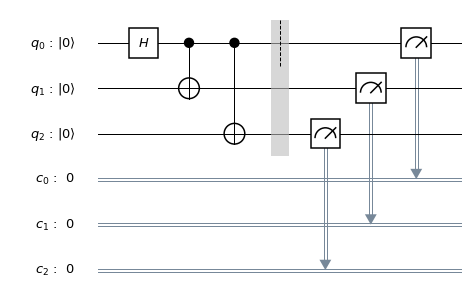

In [33]:
#drawing the circuit
qc.draw(output='mpl')

### Running circuits on real devices

Today's quantum information processors are small and noisy, but are advancing at a fast pace. They provide a great opportunity to explore what [noisy, intermediate-scale quantum (NISQ)](https://arxiv.org/abs/1801.00862) computers can do.

The IBMQ provider uses a queue to allocate the devices to users. We now choose a device with the least busy queue which can support our program (has at least 3 qubits).

In [34]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > 4 and
                                                       not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


To run the circuit on the backend, we need to specify the number of shots and the number of credits we are willing to spend to run the circuit. Then, we execute the circuit on the backend using the ``execute`` function.

In [35]:
from qiskit.tools.monitor import job_monitor
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

``job_exp`` has a ``.result()`` method that lets us get the results from running our circuit.

<div class="alert alert-block alert-info">
<b>Note:</b> When the .result() method is called, the code block will wait until the job has finished before releasing the cell.
</div>

In [36]:
result_exp = job_exp.result()

Like before, the counts from the execution can be obtained using ```get_counts(qc)``` 

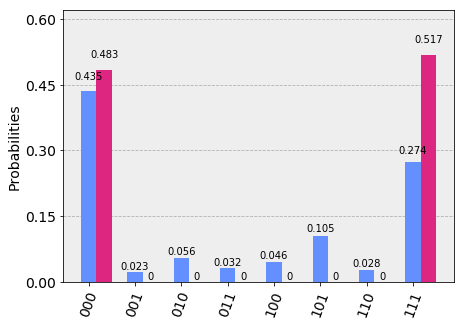

In [37]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

### Simulating circuits using a HPC simulator

The IBMQ provider also comes with a remote optimized simulator called ``ibmq_qasm_simulator``. This remote simulator is capable of simulating up to 32 qubits. It can be used the 
same way as the remote real backends. 

In [38]:
backend = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)

In [39]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_hpc = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

In [40]:
result_hpc = job_hpc.result()

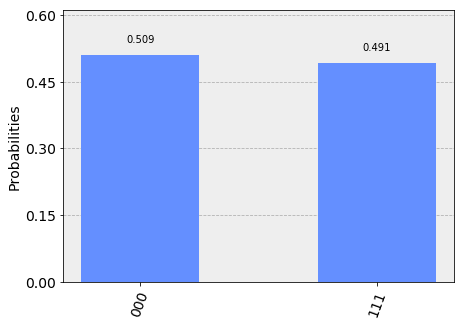

In [41]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)

### Retrieving a previously ran job

If your experiment takes longer to run then you have time to wait around, or if you simply want to retrieve old jobs back, the IBMQ backends allow you to do that.
First you would need to note your job's ID:

In [42]:
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))        

JOB ID: 5c3a8a1aa9fe2f005628f25a


Given a job ID, that job object can be later reconstructed from the backend using retrieve_job:

In [43]:
job_get=backend.retrieve_job(jobID)

and then the results can be obtained from the new job object. 

In [44]:
job_get.result().get_counts(qc)

{'000': 445,
 '001': 24,
 '010': 57,
 '011': 33,
 '100': 47,
 '101': 108,
 '110': 29,
 '111': 281}

## Practical exercises<a id='exercises'></a>

### Half adder circuit

The half adder produces the addition of numbers. 
Usually, the input corresponds to __A__ and __B__ and give the output __S__ (sum) and __C__ (carry).

<img src="img/Half_Adder.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="center">



| $q_0$ (input) = A | $q_1$ (input) = B | $q_1$ (output) = S  | $q_2$ (output) = C |
|-----------------|-----------------|-------------------|------------------|
|        0        |         0       |             0     |      0     |
|        1        |         0       |      1            |      0     |
|        0        |         1       |      1     |      0     |
|        1        |         1       |      0     |      1     |

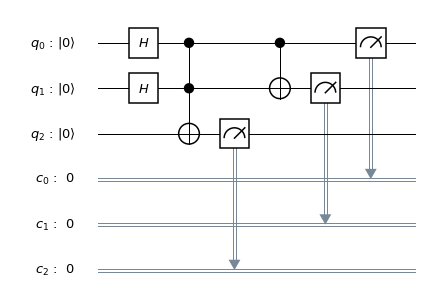

In [45]:
half_adder = QuantumCircuit(q, c)

half_adder.h(q[0])
half_adder.h(q[1])

half_adder.ccx(q[0], q[1], q[2])
half_adder.cx(q[0], q[1])

half_adder.measure(q[0], c[0])
half_adder.measure(q[1], c[1])
half_adder.measure(q[2], c[2])

half_adder.draw(output='mpl')

In [46]:
job_haSim = execute(half_adder, backend_sim, shots=1024)

result_haSim = job_haSim.result()

{'011': 241, '101': 254, '010': 251, '000': 278}


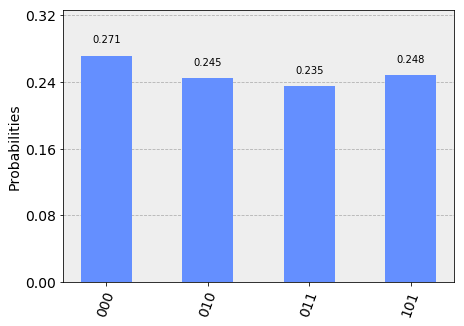

In [47]:
counts_ha = result_haSim.get_counts(half_adder)
print(counts_ha)

plot_histogram(counts_ha)

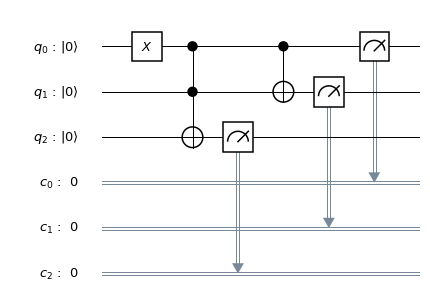

In [19]:
half_adder_1 = QuantumCircuit(q, c)

half_adder_1.x(q[0])

half_adder_1.ccx(q[0], q[1], q[2])
half_adder_1.cx(q[0], q[1])

half_adder_1.measure(q[0], c[0])
half_adder_1.measure(q[1], c[1])
half_adder_1.measure(q[2], c[2])

half_adder_1.draw(output='mpl')

'CSA':... 
 {'011': 1024}


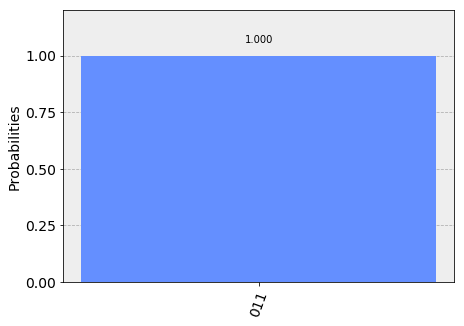

In [22]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job_haSim_1 = execute(half_adder_1, backend_sim, shots=1024)

result_haSim_1 = job_haSim_1.result()

counts_ha_1 = result_haSim_1.get_counts(half_adder_1)
print("'CSA':... \n",counts_ha_1)

plot_histogram(counts_ha_1)

In [50]:
backend = IBMQ.get_backend('ibmqx4')

shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_ha_exp = execute(half_adder_1, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_ha_exp)

result_exp_ha = job_ha_exp.result()

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

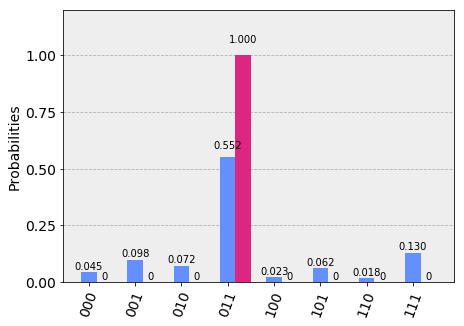

In [51]:
counts_exp_ha = result_exp_ha.get_counts(half_adder_1)
plot_histogram([counts_exp_ha,counts_ha_1])

In [23]:
# It is possible to check the compiled circuit and the operations as run on the physical device
from qiskit import compile
from qiskit.converters import qobj_to_circuits

In [24]:
qasm_half_adder_sim = compile(job_ha_exp, backend)

qasm_haslf_adder_s = qobj_to_circuits(qasm_half_adder_sim)[0]

In [28]:
qasm_half_adder_s.draw()

In [60]:
qasm_half_adder_exc = get_compiled_qasm(half_adder_1, backend)
qasm_half_adder_e = qiskit.load_qasm_string(qasm_half_adder_exc)
qasm_half_adder_e.draw()

C:\Users\Ana\AppData\Roaming\Python\Python36\site-packages\qiskit\wrapper\_wrapper.py:30: DeprecationWarning: The load_qasm_string() function is deprecated and will be removed in a future release. Instead use QuantumCircuit.from_qasm_str().
  'QuantumCircuit.from_qasm_str().', DeprecationWarning)


### The Deutsch-Jozsa problem

We are given a black box quantum computer known as an oracle that implements some function $f:\{0,1\}^n\rightarrow \{0,1\}$ - it takes n-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either constant (0 on all outputs or 1 on all outputs) or balanced (returns 1 for half of the input domain and 0 for the other half); the task then is to determine if $f$ is constant or balanced by using the oracle. 

<img src="img/Deutsch-Jozsa.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

Finally we examine the probability of measuring $ |0\rangle ^{\otimes n}$, which evaluates to 1 if $f ( x )$ is constant (constructive interference) and 0 if $f ( x )$ is balanced (destructive interference). 

1. Implement an oracle for a 1-qubit constant function.
2. Implement an oracle for a 2-qubit balanced funtion.

### Toffoli decomposition

Toffoli gates cannot be physically implemented in most experimentally demonstrated quantum processors.

1. How to decompose a Toffoli gate using CNOT and Hadamard operations?

<img src="img/ToffolifromCNOT.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

## Get backend device information

It is possible to get information about the properties of particular backend, such as gate and measurement error (per qubit), qubit connectivity or coherence times.

In [61]:
backend.properties()

C:\ProgramData\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


BackendProperties(backend_name='ibmqx4', backend_version='1.0.0', gates=[Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[0]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error', unit='', value=0.0010302181416348977)], qubits=[0]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error', unit='', value=0.0020604362832697953)], qubits=[0]), Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[1]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error', unit='', value=0.010576506962994059)], qubits=[1]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 1, 13, 10, 56, 42, tzinfo=tzutc()), name='gate_error

### Quantum devices - experimental properties

#### Physical gate set

Although IBM's interface allows the user to program a quantum algorithm using a broad set of single and multi-qubit gates, these are compiled into the two types of quantum operations which can be directly implemented physically. One is a unitary operation:

$$U(\theta, \phi, \lambda) = R_Z(\phi) R_Y(\theta) R_Z(\lambda)$$

acting on a single qubit, which can be represented as a Bloch sphere qubit rotation on the z-axis, followed by a rotation on the y-axis and another rotation on the z-axis (i.e. a generalised Euler rotation). The other physically implementable operation is a controlled NOT gate (CNOT, or CX). All quantum algorithms to be performed on actual quantum devices need to be decomposed into a sequence of these two types of operations.


#### Qubit map

Besides the restriction regarding the available gates, there are further physical constraints given by the physical architecture of the chip. In fact, CNOT gates can be directly applied only to qubits that are connected.

<img src="img/qubit_map.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

a) IBM Q5 Tenerife;
b) IBM Q20 Tokyo;

There are ways to circumvent the chip's architecture limitations (for example, by using SWAP operations to allow for a CNOT gate between otherwise physically uncoupled qubits). The study and development of efficient mapping algorithms between logical (software) and physical qubits, for a given quantum program, has only recently started receiving serious attention from the quantum information community. As the size and complexity of quantum processor chips increase, efficient mapping algorithms will become crucial to successful demonstrations of the applications of quantum computers.


#### Coherence times

Current quantum computations are “fragile”. A physical qubit does not hold its state indefinitely, but undergoes random bit-flips and loses its phase over time, i.e. undergoes decoherence. Decoherence is the loss of quantum "properties" of a quantum system. Quantum devices have associated decoherence times, which limit the number of quantum operations that can be performed before the results are "drowned" by noise. 

One can distinguish between two measures of decoherence:

1. $T_1$ is the "longitudinal coherence time" (also known as "amplitude damping"), and it measures loss of energy from the system.
2. $T_2$ is the "transverse coherence time" (also known as "phase damping").

<img src="img/coherence_times.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

One way to estimate $T_1$ is to initialize a qubit to the ground state $| 0 \rangle$ (for , apply an $X$ gate to turn it into $| 1 \rangle$, and measure it in the computational basis after a time $t$. The probability of the qubit staying in the $| 1 \rangle$ state is expected to follow an exponential decay curve $e^{-t/T_1}$. To experimentally determine $T_2$, one can initialise a qubit to the ground state $| 0 \rangle$, apply an Hadamard transform $H$ to change it into $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$ and wait for a time $t$ before applying another transform $H$ and measuring the qubit on the computational basis.